In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matr

ImportError: cannot import name 'plot_confusion_matr' from 'sklearn.metrics' (/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [2]:
!ls

Data                                Project3Patrick.ipynb
MainNotebookDragonPatrick.ipynb     count_plot.png
MainNotebookDragonPatrickCopy.ipynb purchase_fre_job.png


In [3]:
df = pd.read_csv('data/training_set_variables.csv')
df1 = pd.read_csv('data/training_set_values.csv')

In [4]:
df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
df.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [7]:
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,status_group
count,59400
unique,3
top,functional
freq,32259


In [8]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [9]:
df = df.merge(df1, left_on='id', right_on='id')
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [11]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [12]:
def conditions(p):
    if (p['status_group'] == 'functional'):
        return 1
    elif (p['status_group'] == 'non functional')  or (p['status_group'] == 'functional needs repair'):
        return 0

In [13]:
# functional = 1
# non functional/functional needs repair

df['Pump_Status'] = df.apply(conditions, axis=1)
df.tail()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Pump_Status
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,1
59399,26348,functional,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1


In [14]:
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Pump_Status
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1


In [15]:
df['Pump_Status'].value_counts()

1    32259
0    27141
Name: Pump_Status, dtype: int64

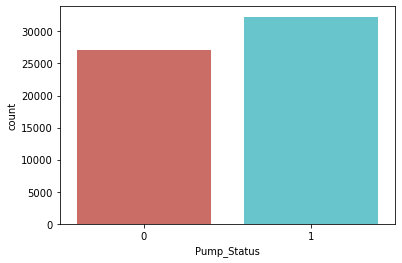

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x='Pump_Status', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [17]:
fun_cnt = len(df[df['Pump_Status']==0])
non_fun_cnt = len(df[df['Pump_Status']==1])
total = fun_cnt + non_fun_cnt
pct_of_fun = fun_cnt / (total)
print("The percentage of functional wells is", pct_of_fun*100)
pct_of_non_fun = non_fun_cnt / (total)
print("The percentage of non-functional wells is", pct_of_non_fun*100)

The percentage of functional wells is 45.69191919191919
The percentage of non-functional wells is 54.3080808080808


In [18]:
df.groupby('Pump_Status').mean()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
Pump_Status,,,,,,,,,,
0,37208.290299,146.320460,582.917505,33.881735,-5.707354,0.397038,17.294499,6.218194,170.825356,1247.267529
1,37036.753154,461.798235,740.131188,34.242071,-5.704921,0.539012,13.616417,5.134660,187.553303,1345.567718


In [19]:
# Train test split to create a holdout set.
X = df.drop(columns=['Pump_Status'])
y = df['Pump_Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,random_state=0)

In [20]:
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [21]:
print(num_cols)
print(ohe_cols)
print(freq_cols)

['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
['status_group', 'basin', 'public_meeting', 'recorded_by', 'permit', 'extraction_type_class', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management', 'source']


In [ ]:
!pip install --upgrade category_encoders
!pip install category_encoders
import category_encoders as ce
import matplotlib.pyplot as plt

num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))])

In [ ]:
y

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)])

In [ ]:
preprocessor.fit(X_train)

In [139]:
df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Nyabarongo Kegoro            1
Dasiip                       1
Bkhws                        1
Parastatal An                1
Samwel                       1
Name: funder, Length: 1897, dtype: int64

In [140]:
df['installer'].value_counts()

DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
                                  ...  
WINAMU CO                             1
AFRICAN REFLECTIONS FOUNDATION        1
TSRC                                  1
Mashaka M                             1
WASHIMA                               1
Name: installer, Length: 2145, dtype: int64

In [141]:
(df['construction_year'] == 1999).sum()

979

In [142]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [143]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [112]:
# columns to be dropped because of repeats.

In [115]:
fun_cnt = len(new_df[new_df['Pump Status']==0])
non_fun_cnt = len(new_df[new_df['Pump Status']==1])
total = fun_cnt + non_fun_cnt
pct_of_fun = fun_cnt / (total)
print("The percentage of functional wells is", pct_of_fun*100)
pct_of_non_fun = non_fun_cnt / (total)
print("The percentage of non-functional wells is", pct_of_non_fun*100)

The percentage of functional wells is 45.69191919191919
The percentage of non-functional wells is 54.3080808080808


In [146]:
df.groupby('Pump_Status').mean()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
Pump_Status,,,,,,,,,,
0,37208.290299,146.320460,582.917505,33.881735,-5.707354,0.397038,17.294499,6.218194,170.825356,1247.267529
1,37036.753154,461.798235,740.131188,34.242071,-5.704921,0.539012,13.616417,5.134660,187.553303,1345.567718


In [147]:
df.groupby('construction_year').mean()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,Pump_Status
construction_year,,,,,,,,,,
0,37175.147810,39.631291,44.147231,30.516720,-4.717058,0.037761,14.531943,4.994447,11.967550,0.509682
1960,34643.470588,1.176471,1285.009804,36.121969,-4.788381,0.803922,13.362745,5.088235,62.019608,0.235294
1961,40044.380952,15.238095,494.619048,38.083288,-5.067477,0.000000,3.857143,3.285714,354.142857,0.095238
1962,41435.266667,540.000000,1194.833333,37.832565,-4.015291,0.166667,5.900000,3.033333,152.833333,0.233333
1963,38411.023529,2.376471,1078.129412,37.314050,-3.499792,0.000000,2.929412,4.835294,160.117647,0.364706
1964,41264.375000,1.250000,1154.300000,35.735002,-3.547584,0.000000,12.875000,5.225000,235.725000,0.175000
1965,32363.105263,263.684211,1388.421053,36.556296,-3.934590,0.000000,6.105263,4.421053,237.210526,0.578947
1966,36486.529412,36.176471,273.705882,37.963219,-6.021525,27.529412,11.352941,6.705882,497.294118,0.352941
1967,36244.511364,461.363636,923.204545,37.406446,-4.496162,0.000000,5.272727,2.715909,194.443182,0.352273


In [148]:
df.groupby('district_code').mean()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,population,construction_year,Pump_Status
district_code,,,,,,,,,,
0,31329.869565,0.000000,0.000000,36.660254,-6.462376,0.000000,1.000000,0.000000,0.000000,0.173913
1,37131.289519,430.514709,678.767188,32.184403,-4.898312,0.657871,14.063591,182.246415,1396.461198,0.537409
2,36873.049136,450.134968,853.418688,33.945228,-5.004393,0.348966,11.860915,229.002775,1409.657388,0.555178
3,37419.154131,227.125485,642.588918,34.572040,-6.279798,0.172234,11.338968,180.710242,1285.279556,0.495499
4,37171.807868,422.651545,860.858762,35.008006,-6.682858,0.035226,10.841760,132.940771,1349.223247,0.621736
5,36938.385445,253.511478,660.115243,35.359905,-6.370696,0.666208,9.713499,157.913912,1222.440771,0.569100
6,37331.561856,46.450663,307.589347,30.859923,-5.061056,2.271478,10.768041,125.862052,773.491654,0.504418
7,37167.317080,233.902184,727.915345,35.320572,-4.668943,0.004487,8.883937,99.442118,1137.448101,0.602453
8,36896.742090,80.364334,30.663471,34.585217,-3.582127,1.345158,13.889741,87.737296,590.659636,0.564717


In [127]:
new_df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'Pump Status',
       'Pump_Status'],
      dtype='object')

In [126]:
X = new_df.drop(columns=['id', 'date_recorded', 'source', 'funder'])
y = new_df['Pump_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
label_encoder = LabelEncoder()